<a href="https://colab.research.google.com/github/oduoranto/Machine-Learning/blob/main/GAMEINDUSTRY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression


In [10]:
df = pd.read_csv('/content/gaming_industry_trends.csv')
df.columns

Index(['Game Title', 'Genre', 'Platform', 'Release Year', 'Developer',
       'Revenue (Millions $)', 'Players (Millions)', 'Peak Concurrent Players',
       'Metacritic Score', 'Esports Popularity', 'Trending Status'],
      dtype='object')

In [11]:
df.shape

(1000, 11)

identifying missing data

In [15]:
df.isnull()
df.isna()
df.isnull().sum()

,0
Game Title,0
Genre,0
Platform,0
Release Year,0
Developer,0
Revenue (Millions $),0
Players (Millions),0
Peak Concurrent Players,0
Metacritic Score,0
Esports Popularity,0


Removing missing values

In [16]:
df.dropna()

,Game Title,Genre,Platform,Release Year,Developer,Revenue (Millions $),Players (Millions),Peak Concurrent Players,Metacritic Score,Esports Popularity,Trending Status
0,Neon Speed 5,Strategy,Xbox,2011,Capcom,52.28,77.99,21.44,69,No,Stable
1,Cyber Quest 5,Shooter,Mobile,2018,Bandai Namco,4345.97,65.28,11.22,72,No,Stable
2,Fantasy Rivals 1,Strategy,Xbox,2018,Microsoft,1278.29,160.09,48.40,51,Yes,Declining
3,Warzone Chronicles 5,Horror,Xbox,2002,Microsoft,361.26,98.14,32.96,91,No,Declining
4,Cyber Quest 4,RPG,PC,2018,EA,4549.27,199.47,58.39,74,No,Stable
...,...,...,...,...,...,...,...,...,...,...,...
995,Battle Warriors 1,Shooter,Cross-Platform,2006,Rockstar,1262.82,79.69,15.90,99,No,Rising
996,Battle Warriors 4,Simulation,PlayStation,2016,Capcom,367.94,152.19,28.36,68,Yes,Declining
997,Legends of Valor 3,RPG,Xbox,2020,Microsoft,2547.81,83.77,22.98,59,Yes,Rising
998,Galaxy Raiders 4,Sports,Mobile,2015,Ubisoft,2737.73,31.27,13.03,61,Yes,Declining


Distribution Analysis of the data

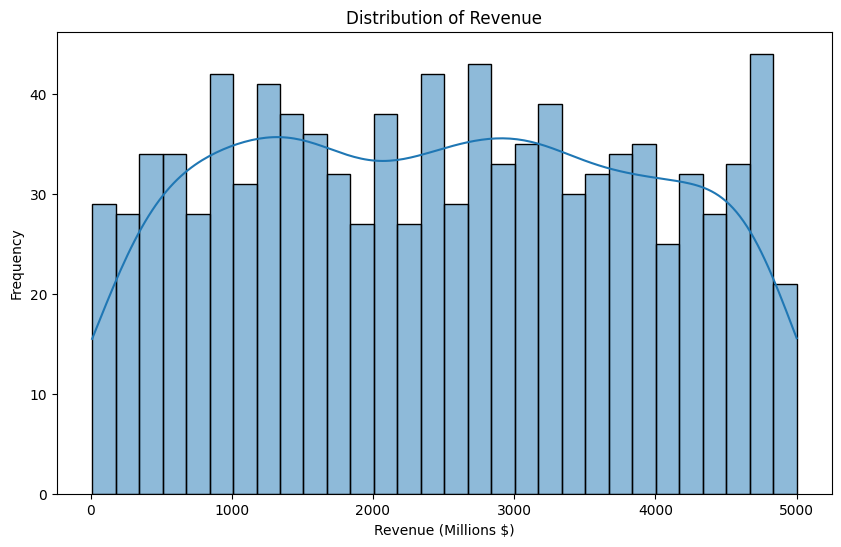

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(df['Revenue (Millions $)'], bins=30, kde=True)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue (Millions $)')
plt.ylabel('Frequency')
plt.show()


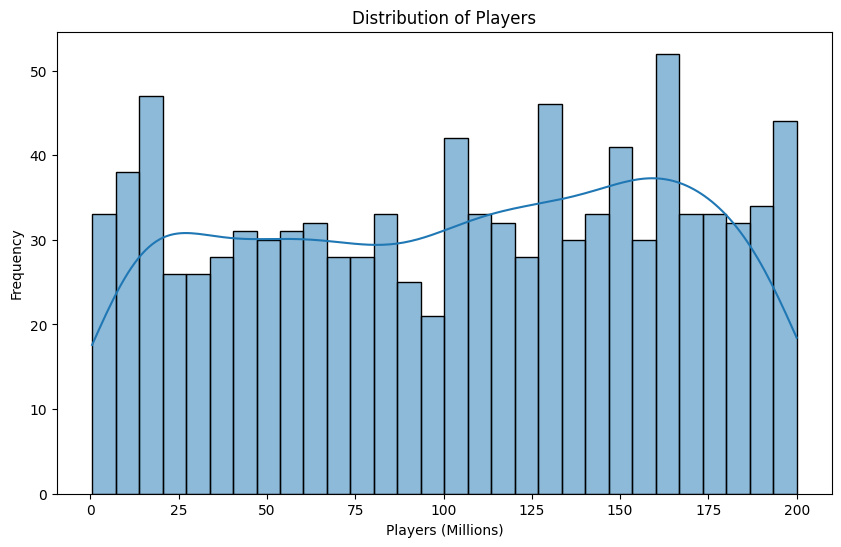

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Players (Millions)'], bins=30, kde=True)
plt.title('Distribution of Players')
plt.xlabel('Players (Millions)')
plt.ylabel('Frequency')
plt.show()

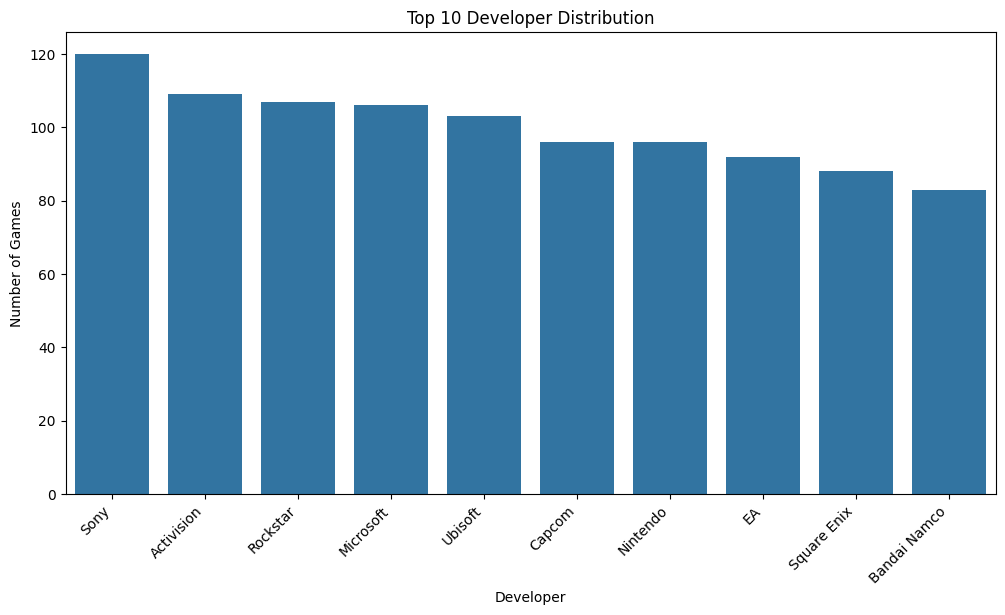

In [22]:
developer_counts = df['Developer'].value_counts().head(10) #top 10 developers.
plt.figure(figsize=(12, 6))
sns.barplot(x=developer_counts.index, y=developer_counts.values)
plt.title('Top 10 Developer Distribution')
plt.xlabel('Developer')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.show()

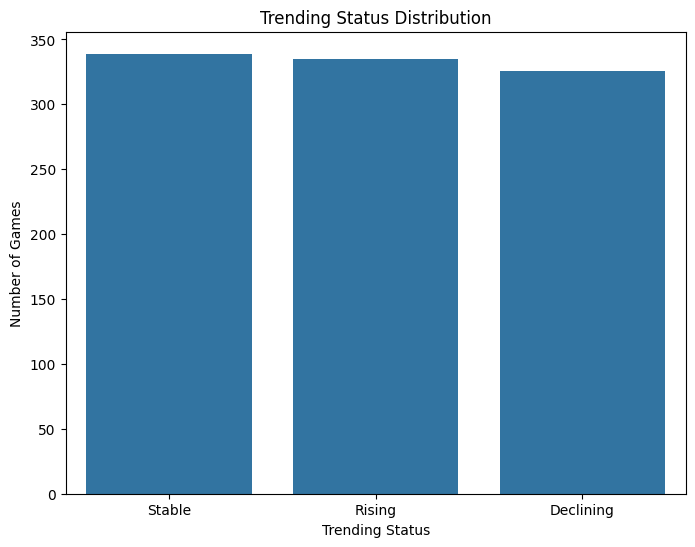

In [23]:
trending_counts = df['Trending Status'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=trending_counts.index, y=trending_counts.values)
plt.title('Trending Status Distribution')
plt.xlabel('Trending Status')
plt.ylabel('Number of Games')
plt.show()

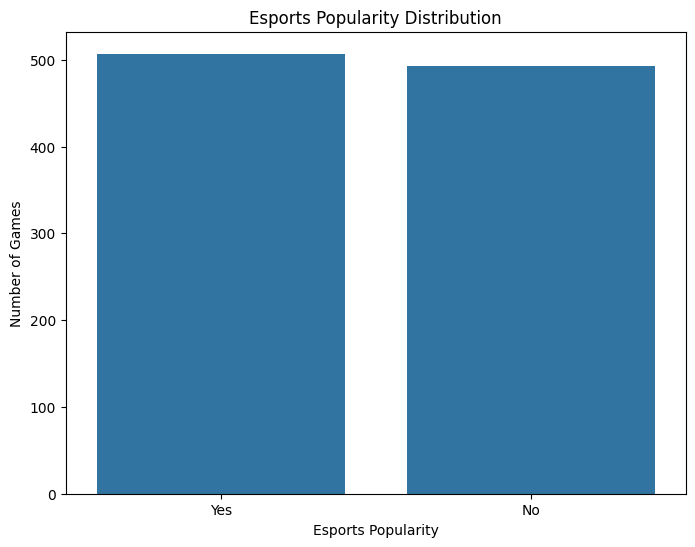

In [24]:
esports_counts = df['Esports Popularity'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=esports_counts.index, y=esports_counts.values)
plt.title('Esports Popularity Distribution')
plt.xlabel('Esports Popularity')
plt.ylabel('Number of Games')
plt.show()

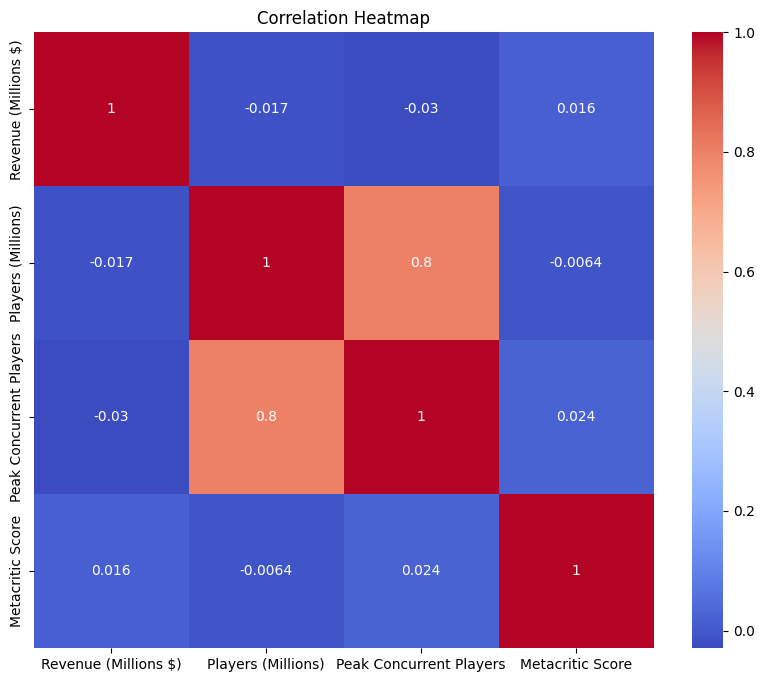

In [25]:
numerical_cols = ['Revenue (Millions $)', 'Players (Millions)', 'Peak Concurrent Players', 'Metacritic Score']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

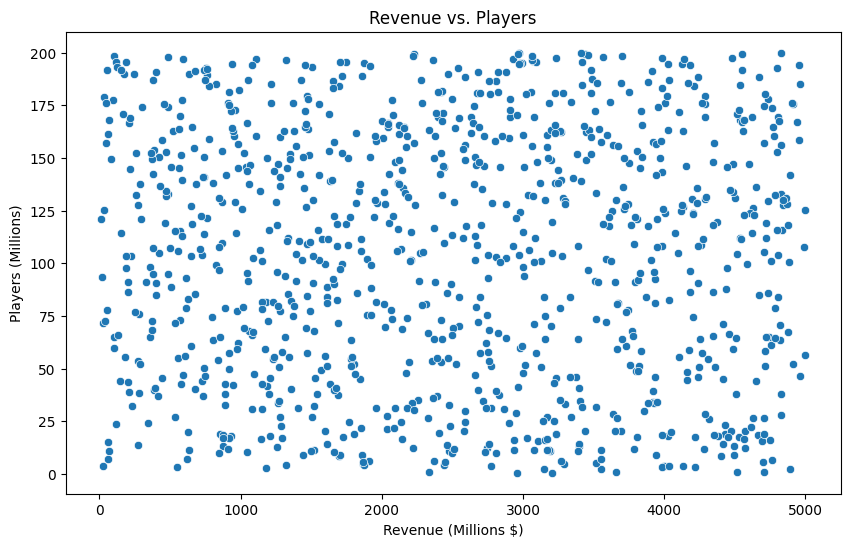

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Revenue (Millions $)', y='Players (Millions)', data=df)
plt.title('Revenue vs. Players')
plt.xlabel('Revenue (Millions $)')
plt.ylabel('Players (Millions)')
plt.show()

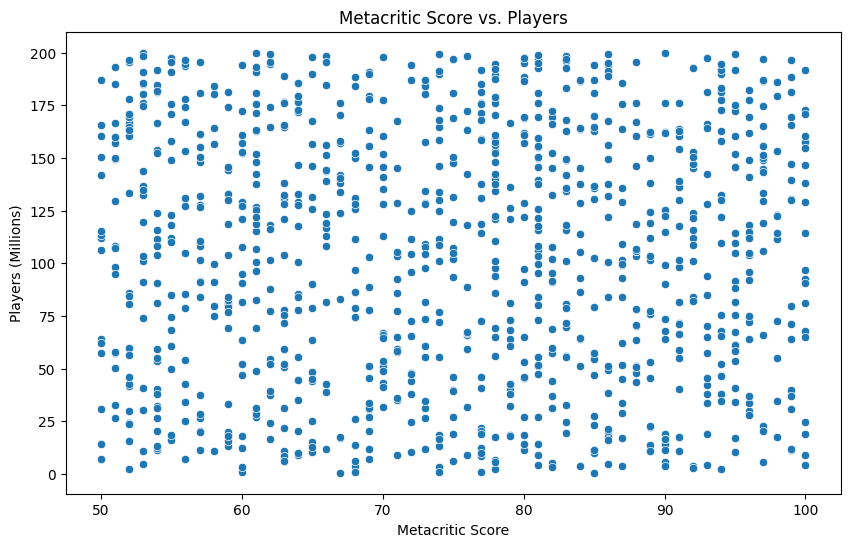

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Metacritic Score', y='Players (Millions)', data=df)
plt.title('Metacritic Score vs. Players')
plt.xlabel('Metacritic Score')
plt.ylabel('Players (Millions)')
plt.show()

In [29]:
df = pd.get_dummies(df, columns=['Genre', 'Platform', 'Trending Status', 'Esports Popularity'], drop_first=True) #drop first to avoid multicollinearity.

In [30]:
numerical_cols = ['Revenue (Millions $)', 'Peak Concurrent Players', 'Metacritic Score', 'Release Year'] #Add any other numerical columns.
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [36]:
X = df.drop('Players (Millions)', axis=1) #target variable.
y = df['Players (Millions)']
selector = SelectKBest(f_regression, k=10) #select top 10 features.
selector.fit(X,y)
cols = selector.get_support(indices=True)
X = X.iloc[:,cols]

ValueError: could not convert string to float: 'Neon Speed 5'